## Basic Data processing 
- initiating sklearn libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline


### Loading dataset
- I had problem to read dataset using panda, because original file has double cotation(before and after every column name). I removed all of that, after that work perfectly.

In [73]:
data_df = pd.read_csv("winequality.csv", index_col= False, sep =';')
data_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Dataset Feature

In [74]:
print("*********************************Dataset Info***************************************************************")
print(data_df.info())
print("*********************************Dataset Description************************************************************")
print(data_df.describe())
print("*********************************Dataseet Null Value Check*******************************************************")
data_df.isnull().sum()

*********************************Dataset Info***************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB
None


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data preprocession
-finding categorial data
-finding unique data

In [75]:
bins = (2,5.5,8)
group_nams  = ["bad", "good"]
data_df['quality'] = pd.cut(data_df['quality'], bins = bins, labels= group_nams)

In [76]:
data_df['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [77]:
#assining labels
category_quality = LabelEncoder()
data_df['quality'] = category_quality.fit_transform(data_df['quality']) 

In [78]:
data_df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11,1


In [79]:
#counting category-wise data
data_df['quality'].value_counts() 

1    855
0    744
Name: quality, dtype: int64

/home/anup_ghosh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

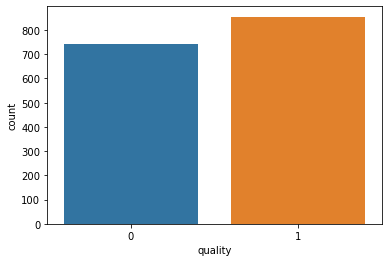

In [81]:
sbn.countplot(data_df['quality'])

### Cheking Outlier

In [82]:
# Seperating variables to Dependent/Target variable (Y) and Independent variable (X)
X = data_df.drop('quality', axis = 1)
y = data_df['quality']

### Normalizing

In [86]:
# Standard scaling
X1= X.copy()
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X1

ValueError: could not convert string to float: '100.333.333.333.333'